In [1]:
import sys
sys.path.append('../')

import tensorflow as tf
import graphgallery 
import matplotlib.pyplot as plt


# Set if memory growth should be enabled for ALL `PhysicalDevice`.
graphgallery.set_memory_growth()

2 Physical GPUs, 2 Logical GPUs


In [2]:
tf.__version__

'2.1.0'

In [3]:
graphgallery.__version__

'0.2.0'

# Load the Datasets
+ cora
+ citeseer
+ pubmed

In [4]:
from graphgallery.data import Planetoid

# set `verbose=False` to avoid these printed tables
data = Planetoid('cora', root="~/GraphData/datasets", verbose=False)
adj, x, labels = data.graph.unpack()
idx_train, idx_val, idx_test = data.split()


Downloaded dataset files have existed.
Processing...
Processing completed.


In [5]:
data.supported_datasets

{'citeseer', 'cora', 'pubmed'}

# SBVAT model
+ adj: Scipy sparse matrix
+ x: Numpy array-like matrix
+ labels: Numpy array
+ device: can be "CPU" or "GPU"
+ norm_x: `l1` for row-wise normalize for input `x`

In [6]:
from graphgallery.nn.models import SBVAT
model = SBVAT(adj, x, labels, device='GPU:0', norm_x='l1', n_samples=50, seed=123)
model.build()
# train with validation
his = model.train(idx_train, idx_val, verbose=1, epochs=200)
# train without validation
# his = model.train(idx_train, verbose=1, epochs=100)
loss, accuracy = model.test(idx_test)
print(f'Test loss {loss:.5}, Test accuracy {accuracy:.2%}')


<Loss = 3.0087 Acc = 0.8790 Val_Loss = 0.5739 Val_Acc = 0.7435 >: 100%|██████████| 200/200 [00:03<00:00, 59.84it/s]


Test loss 0.5276, Test accuracy 84.00%


## Show model summary

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attributes (InputLayer)         [(2708, 1433)]       0                                            
__________________________________________________________________________________________________
dropout (Dropout)               multiple             0           attributes[0][0]                 
                                                                 graph_convolution[0][0]          
__________________________________________________________________________________________________
adj_matrix (InputLayer)         [(2708, 2708)]       0                                            
__________________________________________________________________________________________________
graph_convolution (GraphConvolu (2708, 16)           22928       dropout[0][0]                

## Show parameters 

In [8]:
# show training parameters
model.show('train')

+-------------------+------------------------------+
|    Parameters     |            Value             |
+===================+==============================+
| Name              | SBVAT                        |
+-------------------+------------------------------+
| as_model          | False                        |
+-------------------+------------------------------+
| callbacks         | None                         |
+-------------------+------------------------------+
| early_stop_metric | val_loss                     |
+-------------------+------------------------------+
| early_stopping    | None                         |
+-------------------+------------------------------+
| epochs            | 200                          |
+-------------------+------------------------------+
| kwargs            | {}                           |
+-------------------+------------------------------+
| monitor           | val_acc                      |
+-------------------+-------------------------

In [9]:
# show model parameters
model.show('model')

+--------------------+----------+
|     Parameters     |  Value   |
+====================+==========+
| Name               | SBVAT    |
+--------------------+----------+
| activations        | ['relu'] |
+--------------------+----------+
| dropouts           | [0.5]    |
+--------------------+----------+
| epsilon            | 0.030    |
+--------------------+----------+
| hiddens            | [16]     |
+--------------------+----------+
| l2_norms           | [0.0005] |
+--------------------+----------+
| lr                 | 0.010    |
+--------------------+----------+
| n_power_iterations | 1        |
+--------------------+----------+
| p1                 | 1        |
+--------------------+----------+
| p2                 | 1        |
+--------------------+----------+
| use_bias           | False    |
+--------------------+----------+
| xi                 | 0.000    |
+--------------------+----------+


In [10]:
# By defaule, show all
model.show()

+--------------------+------------------------------+
|     Parameters     |            Value             |
+====================+==============================+
| Name               | SBVAT                        |
+--------------------+------------------------------+
| activations        | ['relu']                     |
+--------------------+------------------------------+
| as_model           | False                        |
+--------------------+------------------------------+
| callbacks          | None                         |
+--------------------+------------------------------+
| device             | GPU:0                        |
+--------------------+------------------------------+
| dropouts           | [0.5]                        |
+--------------------+------------------------------+
| early_stop_metric  | val_loss                     |
+--------------------+------------------------------+
| early_stopping     | None                         |
+--------------------+------

## Visualization Training 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


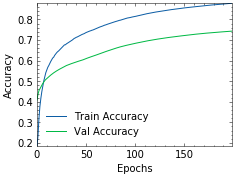

In [11]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['acc'])
    plt.plot(his.history['val_acc'])
    plt.legend(['Train Accuracy', 'Val Accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    

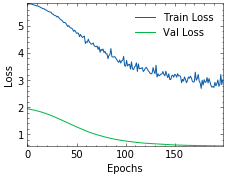

In [12]:
# NOTE: you must install SciencePlots package for a better preview.
with plt.style.context(['science', 'no-latex']):
    plt.plot(his.history['loss'])
    plt.plot(his.history['val_loss'])
    plt.legend(['Train Loss', 'Val Loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.autoscale(tight=True)
    plt.show()    